In [1]:
%matplotlib notebook

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merged DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Number of unique mice IDs
mouse_count = mouse_df["Mouse ID"].value_counts()
len(mouse_count)

249

In [17]:
# Identify duplicates
duplicates = mouse_df[mouse_df.duplicated()]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [19]:
# Full duplicate information
mouse_df.loc[mouse_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Drop mice ID with duplicate
mouse_df = mouse_df.drop(mouse_df[mouse_df["Mouse ID"]=="g989"].index)
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# New unique mice ID count
mouse_count = mouse_df["Mouse ID"].value_counts()
len(mouse_count)

248

In [155]:
# Group DataFrame by drug
regimen_groups_df = mouse_df.groupby(["Drug Regimen"])
regimen_groups_df.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [199]:
# Calculate mean, median, variance, standard deviation and standard error
means = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.merge(means, medians, on="Drug Regimen")
summary_df = pd.merge(summary_df, variances, on="Drug Regimen")
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)_x": "Tumor Volume Mean", "Tumor Volume (mm3)_y": "Tumor Volume Median", "Tumor Volume (mm3)": "Tumor Volume Variance"})
summary_df = pd.merge(summary_df, sds, on="Drug Regimen")
summary_df = pd.merge(summary_df, sems, on="Drug Regimen")
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)_x": "Tumor Volume Standard Deviation", "Tumor Volume (mm3)_y": "Tumor Volume Standard Error"})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# DataFrame for drug counts
regimen_counts = mouse_df["Drug Regimen"].value_counts()
regimen_counts
regimen_count_df = pd.DataFrame(regimen_counts)
regimen_count_df

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


<IPython.core.display.Javascript object>


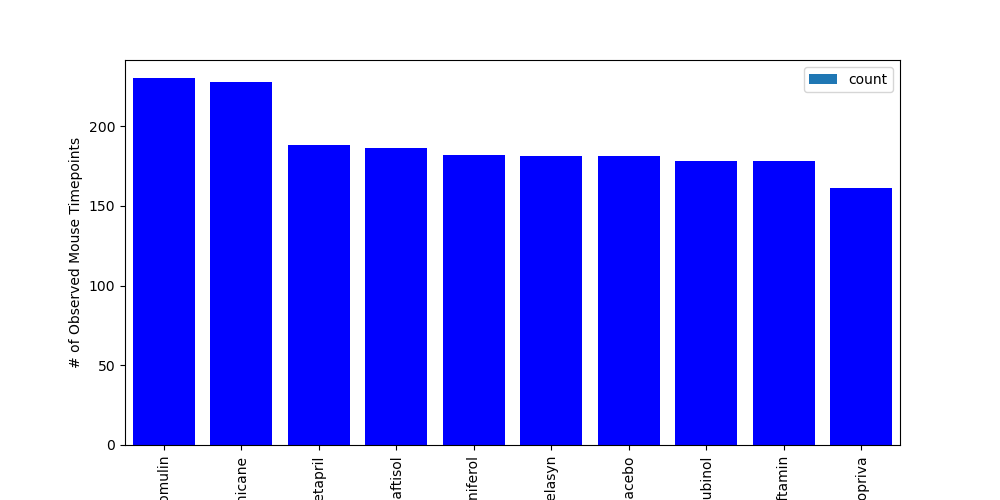

In [49]:
# Bar graph using Pandas
regimen_count_df.plot(kind="bar", figsize=(10,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [50]:
# Bar graph using pyplot
x_axis = np.arange(len(regimen_count_df))
plt.bar(x_axis, regimen_count_df['count'], color='b', align="center")
plt.show()

In [54]:
# DataFrame for sex counts
sex_count = mouse_df['Sex'].value_counts()
sex_count_df = pd.DataFrame(sex_count)
sex_count_df

,count
Sex,
Male,958
Female,935


<IPython.core.display.Javascript object>


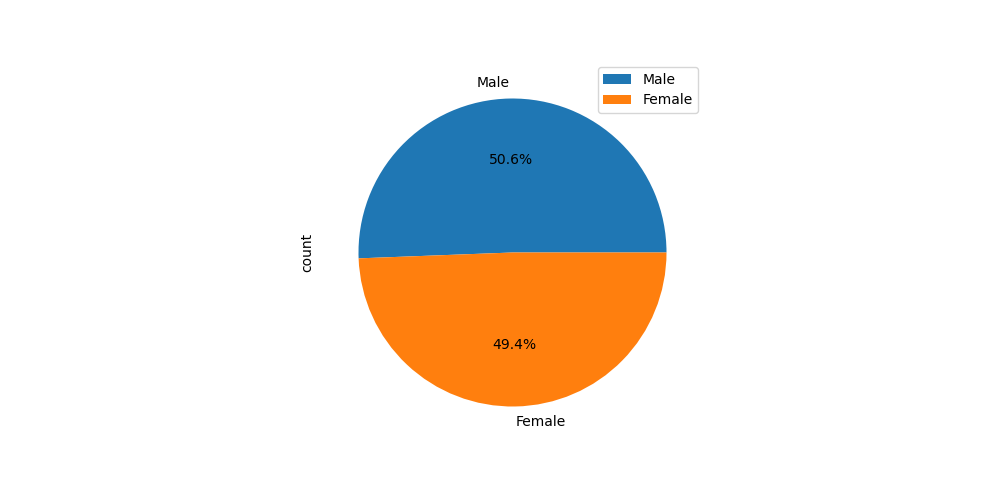

<Axes: ylabel='count'>

In [65]:
# Pie chart using Pandas
sex_count_df.plot(kind="pie", y='count', autopct='%1.1f%%', figsize=(10,5))

In [64]:
# Pie chart using pyplot
sex_count_list = [958, 935]
labels = ["Male", "Female"]
plt.pie(sex_count_list, labels=labels, autopct="%1.1f%%")
plt.show()

In [8]:
# DataFrame for final timepoints
last_df = mouse_df.groupby(['Drug Regimen', 'Mouse ID'], as_index=False).last()
last_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
244,Zoniferol,q633,45,70.827796,2,Male,12,25
245,Zoniferol,s337,45,62.109651,4,Male,14,27
246,Zoniferol,w140,5,47.717952,0,Female,19,30
247,Zoniferol,w575,45,68.401286,3,Female,16,28


In [63]:
# List of final tumor volumes from promising regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = []
capomulin_df = last_df.loc[last_df["Drug Regimen"]=="Capomulin"]
final_tumor_volumes.append(capomulin_df["Tumor Volume (mm3)"])
ramicane_df = last_df.loc[last_df["Drug Regimen"]=="Ramicane"]
final_tumor_volumes.append(ramicane_df["Tumor Volume (mm3)"])
infubinol_df = last_df.loc[last_df["Drug Regimen"]=="Infubinol"]
final_tumor_volumes.append(infubinol_df["Tumor Volume (mm3)"])
ceftamin_df = last_df.loc[last_df["Drug Regimen"]=="Ceftamin"]
final_tumor_volumes.append(ceftamin_df["Tumor Volume (mm3)"])

In [72]:
# Capomulin quartiles, IQR and potential outliers
cap_volumes = capomulin_df["Tumor Volume (mm3)"]

cap_quartiles = cap_volumes.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"The lower quartile of Capomulin tumor volumes is: {cap_lowerq}")
print(f"The upper quartile of Capomulin tumor volumes is: {cap_upperq}")
print(f"The interquartile range of Capomulin tumor volumes is: {cap_iqr}")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_lower_outliers = cap_volumes.loc[cap_volumes < cap_lower_bound]
cap_upper_outliers = cap_volumes.loc[cap_volumes > cap_upper_bound]
print("Capomulin's potential outliers: ")
cap_lower_outliers

The lower quartile of Capomulin tumor volumes is: 32.37735684
The upper quartile of Capomulin tumor volumes is: 40.1592203
The interquartile range of Capomulin tumor volumes is: 7.781863460000004
Capomulin's potential outliers: 


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [73]:
cap_upper_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [69]:
# Ramicane quartiles, IQR and potential outliers
ram_volumes = ramicane_df["Tumor Volume (mm3)"]

ram_quartiles = ram_volumes.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of Ramicane tumor volumes is: {ram_lowerq}")
print(f"The upper quartile of Ramicane tumor volumes is: {ram_upperq}")
print(f"The interquartile range of Ramicane tumor volumes is: {ram_iqr}")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_lower_outliers = ram_volumes.loc[ram_volumes < ram_lower_bound]
ram_upper_outliers = ram_volumes.loc[ram_volumes < ram_lower_bound]
print("Ramicane's potential outliers: ")
ram_lower_outliers

The lower quartile of Ramicane tumor volumes is: 31.56046955
The upper quartile of Ramicane tumor volumes is: 40.65900627
The interquartile range of Ramicane tumor volumes is: 9.098536719999998
Ramicane's potential outliers: 


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [70]:
ram_upper_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [68]:
# Infubinol quartiles, IQR and potential outliers
inf_volumes = infubinol_df["Tumor Volume (mm3)"]

inf_quartiles = inf_volumes.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of Infubinol tumor volumes is: {inf_lowerq}")
print(f"The upper quartile of Infubinol tumor volumes is: {inf_upperq}")
print(f"The interquartile range of Infubinol tumor volumes is: {inf_iqr}")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_lower_outliers = inf_volumes.loc[inf_volumes < inf_lower_bound]
inf_upper_outliers = inf_volumes.loc[inf_volumes > inf_upper_bound]
print("Infubinol's potential outliers: ")
inf_lower_outliers

The lower quartile of Infubinol tumor volumes is: 54.04860769
The upper quartile of Infubinol tumor volumes is: 65.52574285
The interquartile range of Infubinol tumor volumes is: 11.477135160000003
Infubinol's potential outliers: 


55    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [71]:
inf_upper_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [74]:
# Ceftamin quartiles, IQR and potential outliers
cef_volumes = ceftamin_df["Tumor Volume (mm3)"]

cef_quartiles = cef_volumes.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"The lower quartile of Ceftamin tumor volumes is: {cef_lowerq}")
print(f"The upper quartile of Ceftamin tumor volumes is: {cef_upperq}")
print(f"The interquartile range of Ceftamin tumor volumes is: {cef_iqr}")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
cef_lower_outliers = cef_volumes.loc[cef_volumes < cef_lower_bound]
cef_upper_outliers = cef_volumes.loc[cef_volumes > cef_upper_bound]
print("Ceftamin's potential outliers: ")
cef_lower_outliers

The lower quartile of Ceftamin tumor volumes is: 48.72207785
The upper quartile of Ceftamin tumor volumes is: 64.29983003
The interquartile range of Ceftamin tumor volumes is: 15.577752179999997
Ceftamin's potential outliers: 


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [75]:
cef_upper_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [114]:
# Merged DataFrame for desired regimens
merged_df = pd.concat([capomulin_df, ramicane_df, infubinol_df, ceftamin_df])
merged_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
45,Ceftamin,x226,0,45.000000,0,Male,23,28
46,Ceftamin,x581,45,64.634949,3,Female,19,28
47,Ceftamin,x822,45,61.386660,3,Male,3,29
48,Ceftamin,y769,45,68.594745,4,Female,6,27


<IPython.core.display.Javascript object>


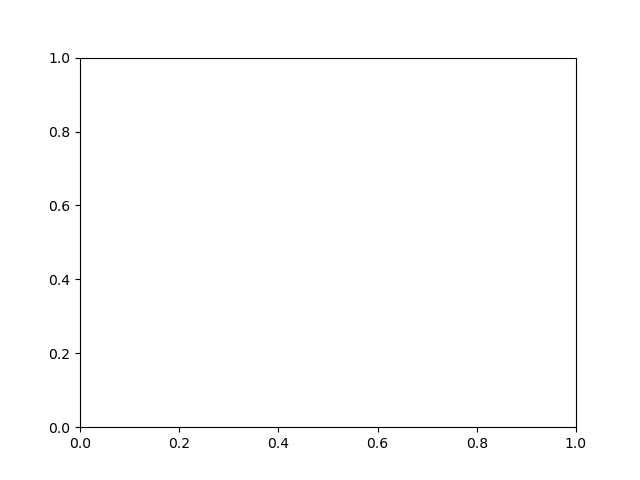

<IPython.core.display.Javascript object>


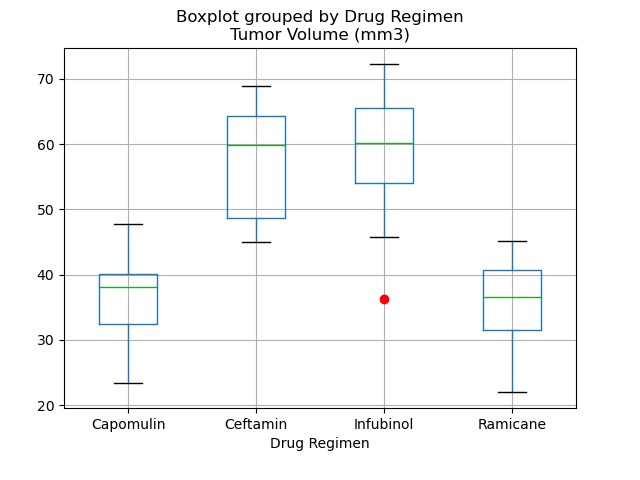

In [120]:
# Box plot of desired regimens
fig1, ax1 = plt.subplots()
merged_df.boxplot('Tumor Volume (mm3)', by='Drug Regimen', sym='r')
plt.show()

In [122]:
# Random mouse treated with Capomulin
random_mouse = mouse_df.loc[mouse_df["Mouse ID"]=="u364"]
random_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
234,u364,0,45.000000,0,Capomulin,Male,18,17
324,u364,5,45.760886,1,Capomulin,Male,18,17
513,u364,10,46.568417,2,Capomulin,Male,18,17
862,u364,15,47.212200,2,Capomulin,Male,18,17
918,u364,20,40.343948,2,Capomulin,Male,18,17
1206,u364,25,35.503616,2,Capomulin,Male,18,17
1310,u364,30,35.978334,2,Capomulin,Male,18,17
1565,u364,35,35.459490,2,Capomulin,Male,18,17
1704,u364,40,36.024138,2,Capomulin,Male,18,17
1889,u364,45,31.023923,3,Capomulin,Male,18,17


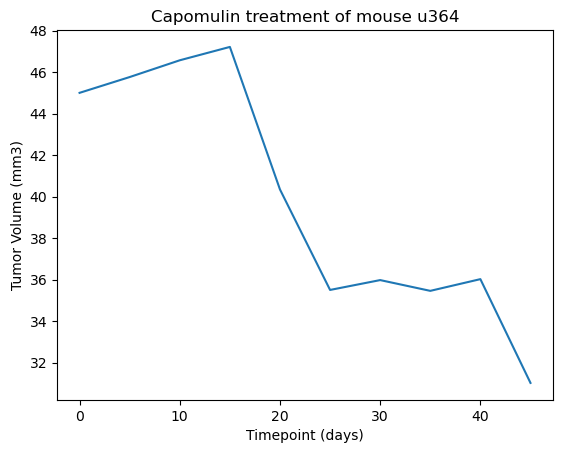

In [130]:
# Line plot for single mouse
plt.plot(random_mouse['Timepoint'], random_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse u364")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [135]:
# Capomulin DataFrame
new_capo_df = pd.concat([capomulin_df])
new_capo_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
5,Capomulin,i557,45,47.685963,1,Female,1,24
6,Capomulin,i738,45,37.311846,2,Female,23,20
7,Capomulin,j119,45,38.125164,1,Female,7,23
8,Capomulin,j246,35,38.753265,1,Female,21,21
9,Capomulin,l509,45,41.483008,3,Male,17,21


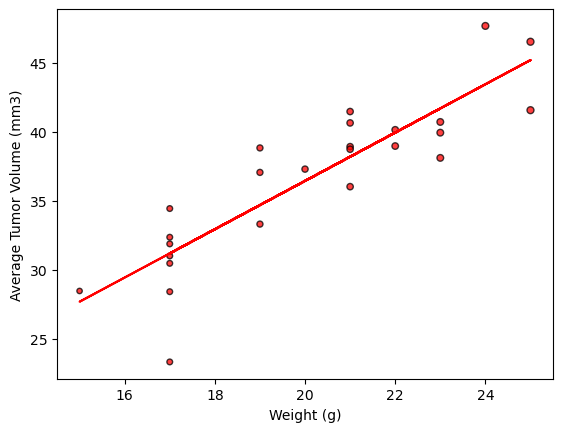

In [143]:
# Scatter plot for entire Capomulin regimen
plt.scatter(new_capo_df['Weight (g)'], new_capo_df['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black",
            s=new_capo_df['Weight (g)'], alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Linear regression model
x_values = new_capo_df['Weight (g)']
y_values = new_capo_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()

In [140]:
# Correlation coefficient
weight = new_capo_df.iloc[:,7]
tumor_volume = new_capo_df.iloc[:,3]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88
